# Introduction to Machine Learning
## Lecture 3 - Classification
### Notebook 4: K-Nearest Neighbor Classifier 
Prapared by: Said Bolluk

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
data = pd.read_csv("penguins.csv")
data.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,0


In [3]:
data.shape

(343, 5)

In [4]:
# Create a copy of the dataset
penguin_data = data.copy()

Check the missing values

In [5]:
data.isnull().sum()

CulmenLength     1
CulmenDepth      1
FlipperLength    1
BodyMass         1
Species          0
dtype: int64

We will discard the rows with empyty inputs before heading to analysis.

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

**Note:** There are various ways of handling missing data rather than simply deleting it. However, there is only one empty row that we can easily remove it without lossing much infomation.

Check the numerical and categorical features in the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 342
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        342 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


All features are numerical, which is great! This means that we do not have to apply encoding to categorical features and increase the feature number.

In [9]:
target_name = "Species"
target = data[target_name]

data = data.drop(columns=[target_name])

## Feature Selection

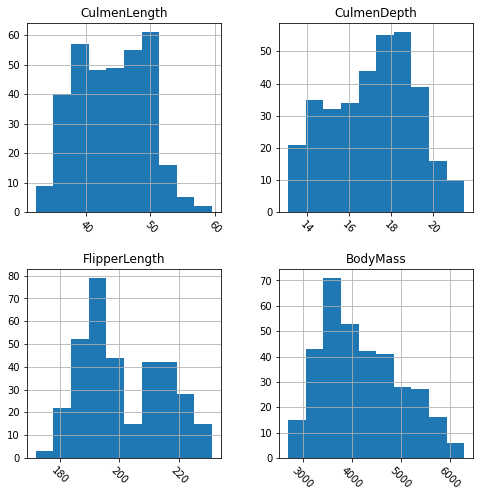

In [10]:
# Histogram view for the numerical features
data.hist(bins=10, figsize=(8, 8), xrot=-45)
plt.show()

The feature distributions is very well as they are similar to the Gaussian Distribution. We can advance to the analysis with all four features.

## Preprocessing

### Transforming numerical features using StandardScaler

In [11]:
# Check the number of data points
n_rows = data.shape[0]
print("Number of rows:", n_rows)

Number of rows: 342


In [12]:
# Check the class distributions of the target
target.value_counts()

0    151
1    123
2     68
Name: Species, dtype: int64

We have three classes: 0, 1, 2. Each class refers to a specific penguin species.

In [13]:
# First, split data into training and test sets

X = data.values
y = target.values

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, 
                                                    shuffle=True, random_state=42)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 222
Test size: 120


In [14]:
# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train[:5]

array([[  58. ,   17.8,  181. , 3700. ],
       [  49.5,   19. ,  200. , 3800. ],
       [  40.6,   18.8,  193. , 3800. ],
       [  43.5,   14.2,  220. , 4700. ],
       [  37.8,   17.3,  180. , 3700. ]])

In [16]:
X_train_scaled[:5]

array([[ 2.58015275,  0.3529542 , -1.42134396, -0.64151314],
       [ 1.00725483,  0.97033437, -0.08758894, -0.51945107],
       [-0.63966183,  0.86743767, -0.57897237, -0.51945107],
       [-0.10302606, -1.4991863 ,  1.31636372,  0.57910754],
       [-1.15779291,  0.09571247, -1.4915416 , -0.64151314]])

# Non-Parametric Classification: K-Nearest Neighbor Classifier 

We will analyze the performance of K-NN classifier with several numbers of neighbors. This way, we can observe the relationship between the model's complexity and generalization performance.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Set the neighborhood values for testing:
neighbors = [1, 2, 3, 4, 5, 15, 25, 50, 75, 100]

accuracy_list = list()

for n in neighbors:
    # Define a model
    knn = KNeighborsClassifier(n_neighbors=n)
    # Fit the training set
    knn.fit(X_train_scaled, y_train)
    # Make predictions over the test set
    predictions = knn.predict(X_test_scaled)
    # Calculate the accuracy score
    accuracy = np.sum(y_test==predictions) / y_test.shape[0]
    accuracy_list.append(accuracy)
    print(f"Accuracy score of the K-NN with n={n}: {accuracy:.3f}")

Accuracy score of the K-NN with n=1: 0.992
Accuracy score of the K-NN with n=2: 0.992
Accuracy score of the K-NN with n=3: 0.983
Accuracy score of the K-NN with n=4: 0.992
Accuracy score of the K-NN with n=5: 1.000
Accuracy score of the K-NN with n=15: 0.983
Accuracy score of the K-NN with n=25: 0.983
Accuracy score of the K-NN with n=50: 0.983
Accuracy score of the K-NN with n=75: 0.958
Accuracy score of the K-NN with n=100: 0.883


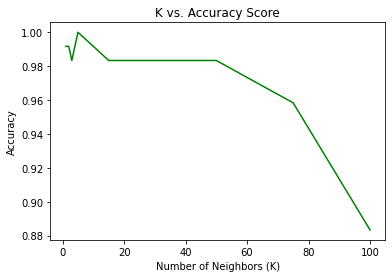

In [19]:
# Visualize the results
plt.figure(figsize=(6, 4))
plt.plot(neighbors, accuracy_list, color="green")
plt.title("K vs. Accuracy Score")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.show()

**Discussion:** 
\
\
(1) The accuracy score decreases as we decrease the number of neighbors the model considers in making predictions. Model complexity is an essential topic in machine learning. When the number of neighbors is small, the model learns the parameter of each specific instance without generalizing the dataset and creating groups with similar patterns (over-fitting). On the other hand, when the number of neighbors is too high, the model overgeneralizes the correlation between features and makes random-like predictions (under-fitting). 
\
\
(2) Another important point is that the accuracy score of the model is too high for every number of neighbors. We have already seen that the feature distributions are satisfying with being close to the Gaussian Distributions. This might be a perfect explanation for such high accuracy scores. Plus, the features might be particular to certain species. It looks like the four features, **CulmenLength, CulmenDepth, FlipperLength, and BodyMass**, are highly sufficient to classify penguins. Therefore, the discriminant function (K-NN Classifier) accurately predicted the classes. We can also say that the class margins to the discriminant's hyperspace are highly distant by looking at the slight variation in the accuracy scores of the models with a different number of neighbors. Therefore, the classifier easily distinguishes the species.

# END